# Lipkin Model: Mackenzie Smith


## 1) Prove the commutation relations for the quasi-spin operators.

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

## 2) Plot the eigenvalues of the LM Hamiltonian matrix in the quasi-spin basis for $\epsilon = 1$, $\Omega = 14$, $N=14$ as a function of $0<V(\Omega -1)/\epsilon <2$. Label eigenvalues using the conserved quantum numbers.

In [291]:
def KUpFac(k,k0):
    return np.sqrt(k*(k+1)-k0*(k0+1))*np.sqrt(k*(k+1)-(k0+1)*(k0+2))

def KUpFac2(k,k0):
    return np.sqrt(k*(k+1)-k0*(k0+1))

def KDownFac(k,k0):
    return np.sqrt(k*(k+1)-k0*(k0-1))*np.sqrt(k*(k+1)-(k0-1)*(k0-2))

def KDownFac2(k,k0):
    return np.sqrt(k*(k+1)-k0*(k0-1))

def BlockMatrix(e,V,K):
    dim = 2*K + 1
    kspace = np.linspace(-K,K,dim,dtype=int)
    matrix = np.zeros((dim,dim))
    for i in range(0,dim):
        if kspace[i] - 2 >= min(kspace):
            matrix[i][i-2] = (-.5*V)*KUpFac(K,kspace[i-2])
        if kspace[i] + 2 <= max(kspace):
            matrix[i][i+2] = (-.5*V)*KDownFac(K,kspace[i+2])
        matrix[i][i] = e*kspace[i]
    return dim,matrix

def BlockMatrix2(K):
    dim = 2*K + 1
    kspace = np.linspace(-K,K,dim,dtype=int)
    matrix = np.zeros((dim,dim))
    for i in range(0,dim):
        if kspace[i] - 1 >= min(kspace):
            matrix[i][i-1] = (.5)*KUpFac2(K,kspace[i-1])
        if kspace[i] + 1 <= max(kspace):
            matrix[i][i+1] = (.5)*KDownFac2(K,kspace[i+1])
    return dim,matrix
#print(BlockMatrix(1,1,1))
def LM_Hamiltonian(e,V,K):
    Matrices = {}
    Dims = []
    for i in range(0,K):
        d,m = BlockMatrix(e,V,i)
#        print(d)
        Dims.append(d)
        Matrices["matrix_{}".format(i)] = m
    Rank = sum(Dims)
    combined_matrix = np.zeros((Rank,Rank))
    start_index = 0
#    print(Dims)
    for i in range(0,K):
#        print(start_index)
        combined_matrix[start_index:start_index + Dims[i], start_index:start_index+Dims[i]] = Matrices["matrix_{}".format(i)]
        start_index+=Dims[i]
#    return np.linalg.eigh(combined_matrix)
    return combined_matrix
#def Q_Matrix(e,V,K):
#    Matrices = {}
#    Dims = []
#    for i in range(K-1,-1,-1):
#        d,m = BlockMatrix2(i)
#        Dims.append(d)
#        Matrices["matrix_{}".format(i)] = m
#    Rank = sum(Dims)
#    combined_matrix = np.zeros((Rank,Rank))
#    start_index = 0
#    for i in range(0,K):
#        combined_matrix[start_index:start_index + Dims[-(i+1)], start_index:start_index+Dims[-(i+1)]] = Matrices["matrix_{}".format(i)]
#        start_index+=Dims[-(i+1)]
#    return combined_matrix

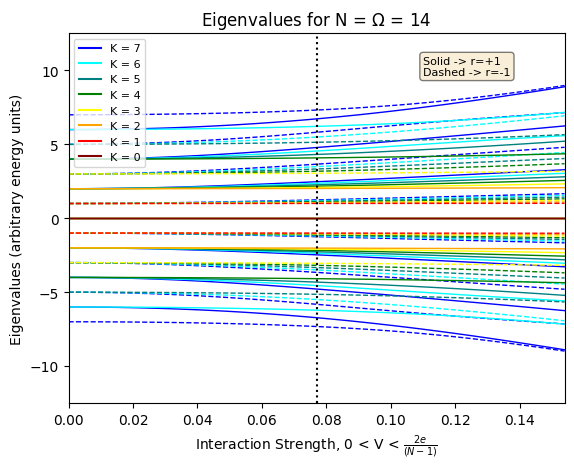

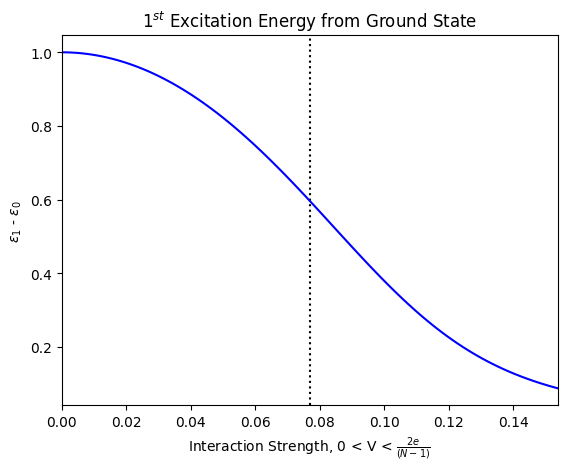

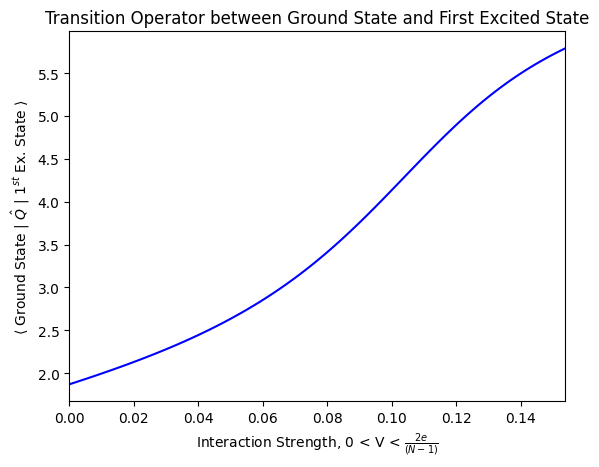

In [310]:
def EigenValuePlotter(e,N,Num):
    Vspace = np.linspace(0,2*e/(N-1),Num)
    K = int(N/2)+1
    Eigenspace = {}
    Eigenspace["lowEigDiff"] = []
    Eigenspace["MatrixElement"] = []
    Step = 0
    Index = 0
    Colors = ['blue', 'cyan', 'teal', 'green', 'yellow', 'orange', 'red', 'maroon']
    Linestyle = ['-', '--']
    rLabel = ['r = +1', 'r = -1']
    colorLabel = []
    plt.figure(1)
    textstr = '\n'.join((r'Solid -> r=+1',
                       r'Dashed -> r=-1'))
#    for i in range(0,K):
    for i in range(K-1,-1,-1):
        step,ignore = BlockMatrix(1,.1,i)
        Ki = i
        for j in range(Step,Step + step):
            Eigenspace["value_{}".format(j)] = []
        for j in range(0,len(Vspace)):
            d,m = BlockMatrix(1,Vspace[j],i)
            values,vectors = np.linalg.eigh(m)
#            baba,booey = LM_Hamiltonian(1,Vspace[1],8)
#            print(baba)
            for k in range(Step,Step + step):
                Eigenspace["value_{}".format(k)].append(values[k-Step])
#                print(values[0])
            if Ki == K-1:
                Eigenspace["lowEigDiff"].append(values[1]-values[0])
                gsvec = vectors[:,0]
                fesvec = vectors[:,1]
#                m1 = Q_Matrix(1,Vspace[j],8)
                d1,m1 = BlockMatrix2(i)
                Qtransform = np.dot(m1,gsvec)
                Eigenspace["MatrixElement"].append(abs(np.dot(fesvec.T,np.dot(m1,gsvec.T))))
#                print(vectors[0])
        if (step - 1)%4 == 0:
            fac = 0
        else:
            fac = 1
        for i in range(Step,Step + step):
            plt.plot(Vspace,Eigenspace["value_{}".format(i)],color=Colors[Index],linestyle=Linestyle[fac%2],linewidth=1.)
            fac += 1
        Index += 1
        Step += step
        colorLabel.append("K = {}".format(Ki))
    plt.ylim(-12.5,12.5)
    plt.legend(handles=[plt.Line2D([0], [0], color=color, linestyle='-') for color in Colors],labels=colorLabel,fontsize=8)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(.11,11,textstr,fontsize=8,verticalalignment='top',bbox=props)
    plt.axvline(x=e/(N-1),color='black',linestyle='dotted')
    plt.xlim(min(Vspace),max(Vspace))
    plt.title('Eigenvalues for N = $\Omega$ = 14')
    plt.xlabel(r'Interaction Strength, 0 < V < $\frac{2e}{(N-1)}$')
    plt.ylabel('Eigenvalues (arbitrary energy units)')
    #plt.legend(handles=[plt.Line2D([0], [0], color='black', linestyle=linestyle) for linestyle in Linestyle],
    #       labels=rLabel, loc='upper right', fontsize='medium')
    plt.show()
    
    plt.figure(2)
    plt.xlim(min(Vspace),max(Vspace))
    plt.title(r"$1^{st}$ Excitation Energy from Ground State")
    plt.xlabel(r'Interaction Strength, 0 < V < $\frac{2e}{(N-1)}$')
    plt.ylabel(r'$\epsilon_{1}$ - $\epsilon_{0}$')
    plt.axvline(x=e/(N-1),color='black',linestyle='dotted')
    plt.plot(Vspace,Eigenspace["lowEigDiff"],color='blue')
    plt.figure(3)
    plt.title("Transition Operator between Ground State and First Excited State")
    plt.xlabel(r'Interaction Strength, 0 < V < $\frac{2e}{(N-1)}$')
    plt.ylabel(r'$\langle$ Ground State | $\hat{Q}$ | $1^{st}$ Ex. State $\rangle$')
    plt.plot(Vspace,Eigenspace["MatrixElement"],color='blue')
    plt.xlim(min(Vspace),max(Vspace))
#    print(Eigenspace)
#    print(Eigenspace)
EigenValuePlotter(1,14,100)

[[ 1.   0.   0.   0.   0.  -0.1]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0. ]
 [-0.1  0.   0.   0.   0.  -1. ]]
[-1.00498756  0.          0.          0.          0.          1.00498756]



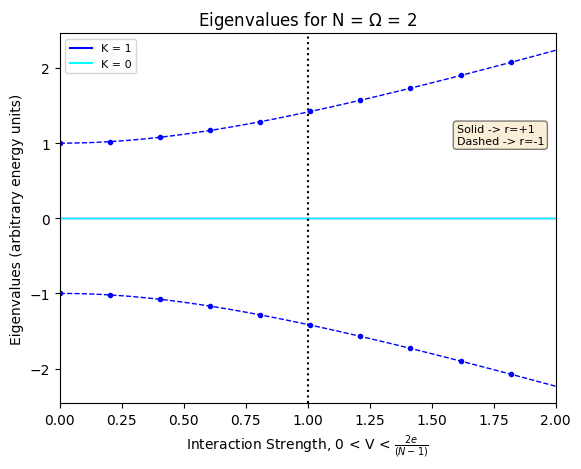

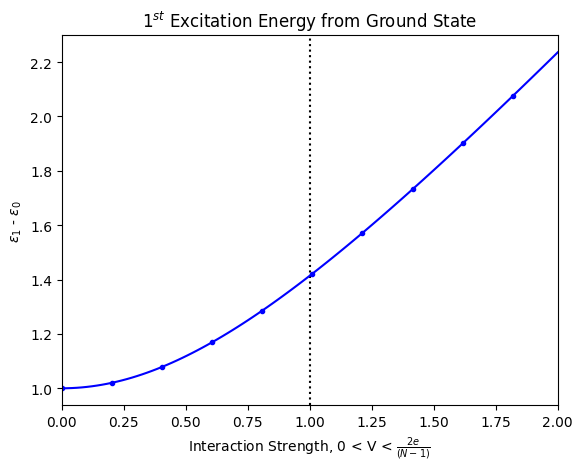

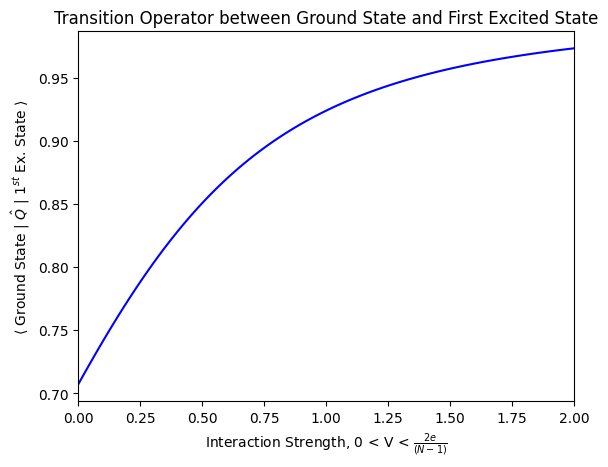

In [332]:
## Omega = N = 2
def CIbasis(e,V):
    matrix = np.zeros((6,6))
    for i in range(0,6):
        for j in range(0,6):
            if i == j and i == 0:
                matrix[i][i] = e
            elif i == j and i == 5:
                matrix[i][i] = -e
            elif i == 5 and j == 0:
                matrix[i][j] = -V
            elif i == 0 and j == 5:
                matrix[i][j] = -V
    return matrix
print(CIbasis(1,.1))
eigval,eigvec = np.linalg.eigh(CIbasis(1,.1))
print(eigval)
#print(eigvec)
print("")

def EigenValuePlotter2(e,N,Num):
    Vspace = np.linspace(0,2*e/(N-1),Num)
    K = int(N/2)+1
    Eigenspace = {}
    Eigenspace["lowEigDiff"] = []
    Eigenspace["MatrixElement"] = []
    Eigenspace["lowEigCI"] = []
    Eigenspace["highEigCI"] = []
    Eigenspace["CI_V"] = []
    Eigenspace["lowEigDiffCI"] = []
    Eigenspace["Diff"] = []
    Step = 0
    Index = 0
    Colors = ['blue', 'cyan', 'teal', 'green', 'yellow', 'orange', 'red', 'maroon']
    Linestyle = ['-', '--']
    rLabel = ['r = +1', 'r = -1']
    colorLabel = []
    plt.figure(1)
    textstr = '\n'.join((r'Solid -> r=+1',
                       r'Dashed -> r=-1'))
#    for i in range(0,K):
    for i in range(K-1,-1,-1):
        step,ignore = BlockMatrix(1,.1,i)
        Ki = i
        for j in range(Step,Step + step):
            Eigenspace["value_{}".format(j)] = []
        for j in range(0,len(Vspace)):
            d,m = BlockMatrix(1,Vspace[j],i)
            values,vectors = np.linalg.eigh(m)
#            baba,booey = LM_Hamiltonian(1,Vspace[1],8)
#            print(baba)
            for k in range(Step,Step + step):
                Eigenspace["value_{}".format(k)].append(values[k-Step])
#                print(values[0])
            if Ki == K-1:
                Eigenspace["lowEigDiff"].append(values[1]-values[0])
                gsvec = vectors[:,0]
                fesvec = vectors[:,1]
#                m1 = Q_Matrix(1,Vspace[j],8)
                d1,m1 = BlockMatrix2(i)
                Qtransform = np.dot(m1,gsvec)
                Eigenspace["MatrixElement"].append(abs(np.dot(fesvec.T,np.dot(m1,gsvec.T))))
            if Ki == K-1 and j%10 == 0:
                CI = CIbasis(e,Vspace[j])
                eigval2,eigvec2 = np.linalg.eigh(CI)
                Eigenspace["lowEigCI"].append(min(eigval2))
                Eigenspace["highEigCI"].append(max(eigval2))
                Eigenspace["CI_V"].append(Vspace[j])
                Eigenspace["lowEigDiffCI"].append(eigval2[1]-eigval2[0])
                Eigenspace["Diff"].append(Eigenspace["lowEigDiff"][j]-Eigenspace["lowEigDiffCI"][int(j/10)])
#                print(vectors[0])
        if (step - 1)%4 == 0:
            fac = 0
        else:
            fac = 1
        for i in range(Step,Step + step):
            plt.plot(Vspace,Eigenspace["value_{}".format(i)],color=Colors[Index],linestyle=Linestyle[fac%2],linewidth=1.)
            fac += 1
        Index += 1
        Step += step
        colorLabel.append("K = {}".format(Ki))
#    plt.ylim(-12.5,12.5)
    plt.legend(handles=[plt.Line2D([0], [0], color=color, linestyle='-') for color in Colors],labels=colorLabel,fontsize=8)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(1.6,1.25,textstr,fontsize=8,verticalalignment='top',bbox=props)
    plt.axvline(x=e/(N-1),color='black',linestyle='dotted')
    plt.xlim(min(Vspace),max(Vspace))
    plt.title('Eigenvalues for N = $\Omega$ = 2')
    plt.xlabel(r'Interaction Strength, 0 < V < $\frac{2e}{(N-1)}$')
    plt.ylabel('Eigenvalues (arbitrary energy units)')
    plt.plot(Eigenspace["CI_V"],Eigenspace["lowEigCI"],'b.')
    plt.plot(Eigenspace["CI_V"],Eigenspace["highEigCI"],'b.')
    #plt.legend(handles=[plt.Line2D([0], [0], color='black', linestyle=linestyle) for linestyle in Linestyle],
    #       labels=rLabel, loc='upper right', fontsize='medium')
    plt.show()
    
    plt.figure(2)
    plt.xlim(min(Vspace),max(Vspace))
    plt.title(r"$1^{st}$ Excitation Energy from Ground State")
    plt.xlabel(r'Interaction Strength, 0 < V < $\frac{2e}{(N-1)}$')
    plt.ylabel(r'$\epsilon_{1}$ - $\epsilon_{0}$')
    plt.axvline(x=e/(N-1),color='black',linestyle='dotted')
    plt.plot(Vspace,Eigenspace["lowEigDiff"],color='blue')
    plt.plot(Eigenspace["CI_V"],Eigenspace["lowEigDiffCI"],'b.')
    plt.figure(3)
    plt.title("Transition Operator between Ground State and First Excited State")
    plt.xlabel(r'Interaction Strength, 0 < V < $\frac{2e}{(N-1)}$')
    plt.ylabel(r'$\langle$ Ground State | $\hat{Q}$ | $1^{st}$ Ex. State $\rangle$')
    plt.plot(Vspace,Eigenspace["MatrixElement"],color='blue')
    plt.xlim(min(Vspace),max(Vspace))
#    plt.figure(4)
#    plt.plot(Eigenspace["CI_V"],Eigenspace["Diff"])
EigenValuePlotter2(1,2,100)

In [147]:
####################
####################

#IGNORE

d,m = BlockMatrix(1,.1,8)
print(d)
def eigenvalue(V,e,N):
    matrix = LM_Hamiltonian(e,V,int(N/2)+1)
    eigenvalues,eigenvectors = np.linalg.eigh(matrix)
    return eigenvalues


    Vspace = np.linspace(0,15*e/(N-1),Num)
#    print(Vspace)
#    Eigenspace = np.zeros((64))
    Eigenspace = {}
    for i in range(0,64):
        Eigenspace["eigval_{}".format(i)] = []
    for i in range(0,Num):
        nums = eigenvalue(Vspace[i],e,N)/e
        for j in range(0,64):
            Eigenspace["eigval_{}".format(j)].append(nums[j])

17


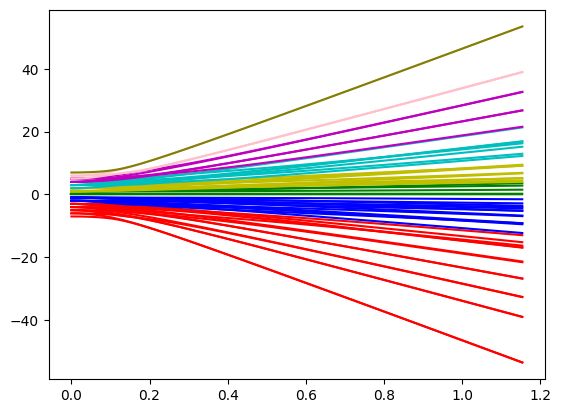

In [138]:
def eigenvaluegrapher(e,N,Num):
    Vspace = np.linspace(0,15*e/(N-1),Num)
#    print(Vspace)
    Eigenspace = np.zeros((64))
    Eigenspace = {}
    for i in range(0,64):
        Eigenspace["eigval_{}".format(i)] = []
        if i < 15:
            Eigenspace["color_{}".format(i)] = 'r'
        elif i < 28:
            Eigenspace["color_{}".format(i)] = 'b'
        elif i < 39:
            Eigenspace["color_{}".format(i)] = 'g'
        elif i < 48:
            Eigenspace["color_{}".format(i)] = 'y'
        elif i < 55:
            Eigenspace["color_{}".format(i)] = 'c'
        elif i < 60:
            Eigenspace["color_{}".format(i)] = 'm'
        elif i < 63:
            Eigenspace["color_{}".format(i)] = 'pink'
        elif i < 64:
            Eigenspace["color_{}".format(i)] = 'olive'
    for i in range(0,Num):
        nums = eigenvalue(Vspace[i],e,N)/e
        for j in range(0,64):
            Eigenspace["eigval_{}".format(j)].append(nums[j])
    plt.figure(1)
    #plt.ylim(-.1,.1)
    for i in range(0,64):
        plt.plot(Vspace,Eigenspace["eigval_{}".format(i)],color=Eigenspace["color_{}".format(i)])
#    return Vspace,Eigenspace1,Eigenspace2,Eigenspace3,Eigenspace4

eigenvaluegrapher(1,14,100)

In [ ]:
plt.figure(1)
for i in range(0,8):
    
    
    ##plt.plot(V,eigenvalues[][])

## 3) What happens with the two lowest eigenvalues around $0<V(\Omega -1)/\epsilon <2$ ? Is it reminiscent of something you've seen before?

## 4) Consider the transition operator $$ \hat{Q} \equiv \hat{K}_x = \frac{1}{2} \bigl ( \hat{K}_+ + \hat{K}_- \bigr ) $$ What is the expectation value of this operator in the ground state?


## 5) Calculate the transition matrix element of this operator between the ground state and the first excited state as a function of  $0<V(\Omega -1)/\epsilon <2$.

## 6) Find the eigenvalues of the LM Hamiltonian matrix in the CI basis (occupation number representation basis) for $\epsilon = 1$, $V=0.1$, $\Omega = 2$, $N=2$ and for $\Omega=2$, $N=4$. Benchmark this result using the quasi-spin formalism. Identify quasi-spin and signature quantum numbers. Discuss the result.

In [326]:
n,m = BlockMatrix2(7)
print(m)

[[0.         1.87082869 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [1.87082869 0.         2.54950976 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         2.54950976 0.         3.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         3.         0.         3.31662479 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         3.31662479 0.         3.53553391
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         3.53553391 0.
  3.67423461 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.        